## Load the dataset
../data/housing-data.csv


In [277]:
import pandas as pd
df = pd.read_csv('../data/housing-data.csv')

In [278]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sqft    47 non-null     int64
 1   bdrms   47 non-null     int64
 2   age     47 non-null     int64
 3   price   47 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [280]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


# Print the histograms

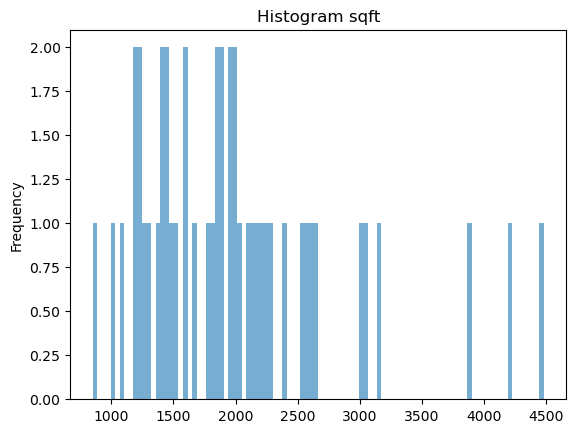

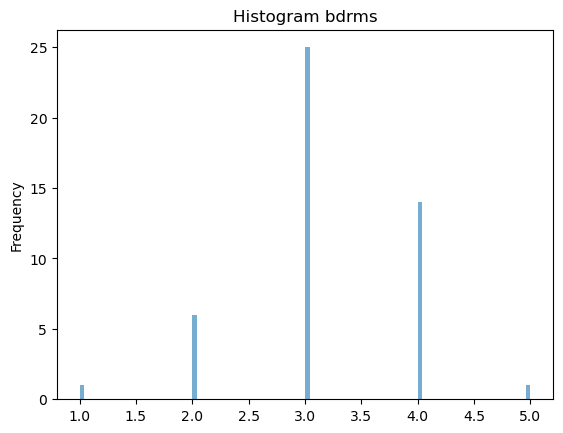

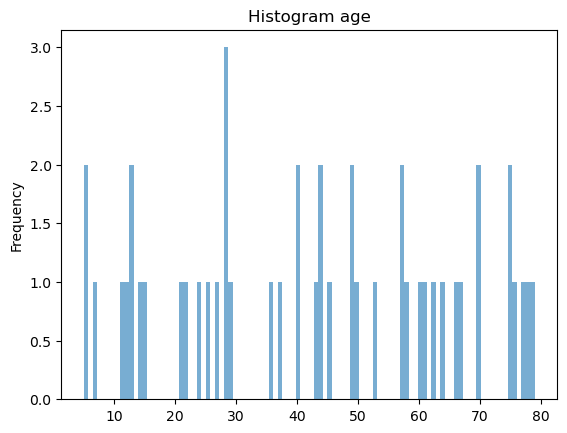

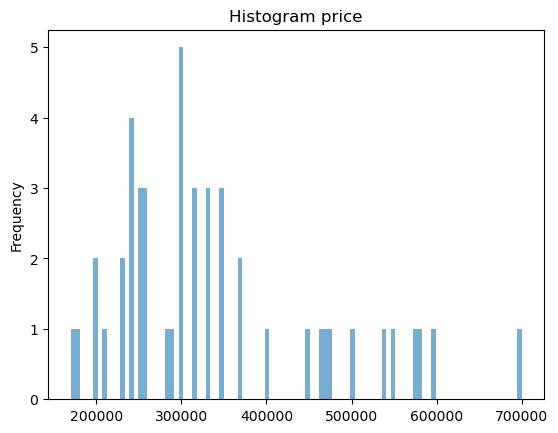

In [281]:
for i in df:
    df[i].plot(
        kind='hist',
        bins=100,
        title=f"Histogram {i}",
        alpha=0.6
    )
    plt.show()

# Create 2 variables
x shall be a matrix with 3 columns (sqft, bdrms, age)
y shall be a vector with 1 column (price)



In [282]:
x = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

# Create model

In [283]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [284]:
model = Sequential()
model.add(Dense(1, input_shape=(3,))) #Predicting one value, based on 3 features
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [285]:
from sklearn.model_selection import train_test_split

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [287]:
len(x_train)

37

In [288]:
len(x)

47

In [289]:
# train the model on the training set
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
2/2 [==============================] - 0s 7ms/step - loss: 126472052736.0000
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 124101918720.0000
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 121908576256.0000
Epoch 4/10
2/2 [==============================] - 0s 10ms/step - loss: 119618461696.0000
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 117417123840.0000
Epoch 6/10
2/2 [==============================] - 0s 12ms/step - loss: 115243196416.0000
Epoch 7/10
2/2 [==============================] - 0s 10ms/step - loss: 113146920960.0000
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 111017984000.0000
Epoch 9/10
2/2 [==============================] - 0s 12ms/step - loss: 108931735552.0000
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 106888036352.0000


In [290]:
df['price'].min()


169900

In [291]:
df['price'].max()

699900

In [292]:
#Normalize features
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

In [293]:
x = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [294]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [295]:
model = Sequential()
model.add(Dense(1, input_shape=(3,))) #Predicting one value, based on 3 features
model.compile(Adam(learning_rate=0.1), 'mean_squared_error')

In [296]:
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
2/2 [==============================] - 0s 4ms/step - loss: 23.6531
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 29.2037
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 8.1359
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 16.6023
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 2.1135
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 8.7242
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 1.1383
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 7.1465
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 1.5218
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 4.6935
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 4.4557
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7817
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss:

In [297]:
from sklearn.metrics import r2_score
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))


1/1 [==============================] - 0s 11ms/step
The R2 score on the Train set is:	0.533
The R2 score on the Test set is:	0.414


In [298]:
model.fit(x_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 0.7194
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 1.9206
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 0.6204
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 1.3961
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 0.6194
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 0.7650
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 0.6873
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4410
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 0.4717
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3818
Epoch 11/500
2/2 [==============================] - 0s 4ms/step - loss: 0.4145
Epoch 12/500
2/2 [==============================] - 0s 4ms/step - loss: 0.3865
Epoch 13/500
2/2 [==============================] - 0s 4ms/st

In [299]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))


1/1 [==============================] - 0s 12ms/step
The R2 score on the Train set is:	0.396
The R2 score on the Test set is:	0.342
